# librerias 

In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Datos

train.csv es la bas de datos sobre la cual haremos construiremos nuestros modelos y test.csv sobre la cual harmeos nuestras previsiones para estimaara los precios. 

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
test.head()

,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,0.51,Very Good,E,SI2,58.3,61.9,5.19,5.20,3.04
1,1,1.02,Very Good,F,SI2,63.0,58.0,6.37,6.43,4.03
2,2,0.59,Ideal,D,VS2,61.9,56.0,5.39,5.34,3.32
3,3,0.90,Very Good,D,VS2,62.3,56.0,6.14,6.18,3.84
4,4,2.01,Premium,J,VS1,60.2,61.0,8.23,8.16,4.93


In [5]:
train.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.50,Premium,F,VS2,61.5,58.0,7.32,7.34,4.51,9.588
1,1,2.01,Very Good,E,SI2,60.6,59.0,8.11,8.25,4.96,9.748
2,2,0.50,Ideal,E,SI1,61.6,57.0,5.13,5.09,3.15,7.255
3,3,0.25,Very Good,F,VVS2,61.6,57.0,4.05,4.08,2.50,6.450
4,4,0.52,Ideal,G,VS2,62.0,55.0,5.16,5.19,3.21,7.721


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       40455 non-null  int64  
 1   carat    40455 non-null  float64
 2   cut      40455 non-null  object 
 3   color    40455 non-null  object 
 4   clarity  40455 non-null  object 
 5   depth    40455 non-null  float64
 6   table    40455 non-null  float64
 7   x        40455 non-null  float64
 8   y        40455 non-null  float64
 9   z        40455 non-null  float64
 10  price    40455 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 3.4+ MB


La naturaleza de los datos nos obliga a tratarlaos para que nuestro modelo pueda interpretarlos de manera numerica. Para ello procedemos a su codificacion. 

# Encoding

Tenemos que pasar las caracteristicas "cut", "color" y "clarity" a caracteristicas numericas. Podriamos apicar aplicar una codificacion "*one-hot*" pero eso aumentaria considerablemnete el numero de caracteristicas y su posterior aumento en la potencia de calcilo necesaria. Es por ello que procederemos al **mapeo** de sus categroias. 

In [7]:
def mapeo (df):
    print ('Cut:', set (df ['cut'])) 
    print ('Color:', set (df ['color'])) 
    print ('Clarity:', set (df ['clarity']))
    df["cut"] = df["cut"].map({'Ideal':1,'Good':2,'Very Good':3,'Fair':4,'Premium':5})
    df["color"] = df["color"].map({'E':1,'D':2,'F':3,'G':4,'H':5,'I':6,'J':7})
    df["clarity"] = df["clarity"].map({'VVS1':1,'IF':2,'VVS2':3,'VS1':4,'I1':5,'VS2':6,'SI1':7,'SI2':8})                     
    return df             

In [8]:
test = mapeo(test)
test

Cut: {'Good', 'Very Good', 'Premium', 'Fair', 'Ideal'}
Color: {'F', 'J', 'E', 'I', 'G', 'H', 'D'}
Clarity: {'SI1', 'SI2', 'VS2', 'VS1', 'VVS1', 'IF', 'VVS2', 'I1'}


,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,0.51,3,1,8,58.3,61.9,5.19,5.20,3.04
1,1,1.02,3,3,8,63.0,58.0,6.37,6.43,4.03
2,2,0.59,1,2,6,61.9,56.0,5.39,5.34,3.32
3,3,0.90,3,2,6,62.3,56.0,6.14,6.18,3.84
4,4,2.01,5,7,4,60.2,61.0,8.23,8.16,4.93
...,...,...,...,...,...,...,...,...,...,...
13480,13480,1.05,5,5,7,61.9,58.0,6.50,6.45,4.01
13481,13481,0.32,1,3,6,62.1,57.0,4.35,4.38,2.71
13482,13482,0.41,5,7,4,61.3,59.0,4.78,4.74,2.92
13483,13483,0.30,5,4,3,62.2,59.0,4.31,4.28,2.67


In [9]:
train = mapeo(train)
train

Cut: {'Good', 'Very Good', 'Premium', 'Fair', 'Ideal'}
Color: {'F', 'J', 'E', 'I', 'G', 'H', 'D'}
Clarity: {'SI1', 'SI2', 'VS2', 'VS1', 'VVS1', 'IF', 'VVS2', 'I1'}


,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.50,5,3,6,61.5,58.0,7.32,7.34,4.51,9.588
1,1,2.01,3,1,8,60.6,59.0,8.11,8.25,4.96,9.748
2,2,0.50,1,1,7,61.6,57.0,5.13,5.09,3.15,7.255
3,3,0.25,3,3,3,61.6,57.0,4.05,4.08,2.50,6.450
4,4,0.52,1,4,6,62.0,55.0,5.16,5.19,3.21,7.721
...,...,...,...,...,...,...,...,...,...,...,...
40450,40450,1.04,3,6,8,59.6,57.0,6.60,6.62,3.94,8.190
40451,40451,0.51,3,1,7,63.3,59.0,5.09,5.05,3.21,7.246
40452,40452,1.51,1,5,6,62.6,57.0,7.37,7.33,4.60,9.277
40453,40453,2.02,5,5,6,61.3,60.0,8.16,8.11,4.99,9.680


# Analisis 

In [14]:
import seaborn as sns

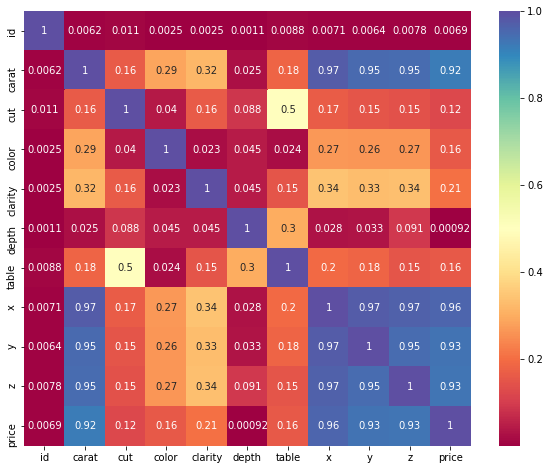

In [15]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,8))
sns.heatmap(train.corr().abs(), annot=True, cmap = 'Spectral' )
plt.show()

Vemos que las caracteristicas "depth" y "table" no aportan informacion de peso explicativo por lo que procederemos a su eliminacion. 

In [17]:
test = test.drop(['table','depth'], axis=1)
train = train.drop(['table','depth'], axis=1)

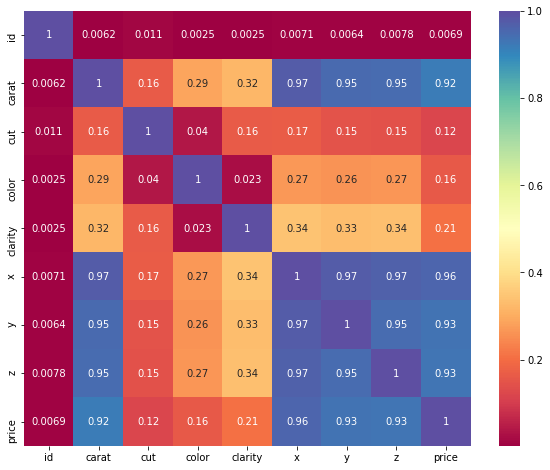

In [21]:
fig = plt.figure(figsize=(10,8))
sns.heatmap(train.corr().abs(), annot=True, cmap = 'Spectral' )
plt.show()

# Exportacion 

In [22]:
train.to_csv('train_no_dummy.csv', index = False)

In [23]:
test.to_csv('test_no_dummy.csv', index = False)